## Иерархическая кластеризация. Метод одиночной связи / ближайшего соседа  
Идея: В многомерном пространстве признаков рассчитывается расстояние (например Евклидово) между всеми точками  
(от каждой точки вычисляется расстояние до других точек). Далее иерархическая кластеризация начинает  
постепенно выделять наши точки в класстеры, объединяя точки, находящиеся друг к другу ближе всего.

### Задача  
Кластеризовать ирис на 3 вида методом ближайшего соседа, используя параметры:  
* длину наружной доли околоцветника (sepal length);
* ширину внутренней доли околоцветника (petal width).

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

clusters = ('red', 'green', 'blue')
n_clusters = len(clusters)

Построим диаграмму кластеров.

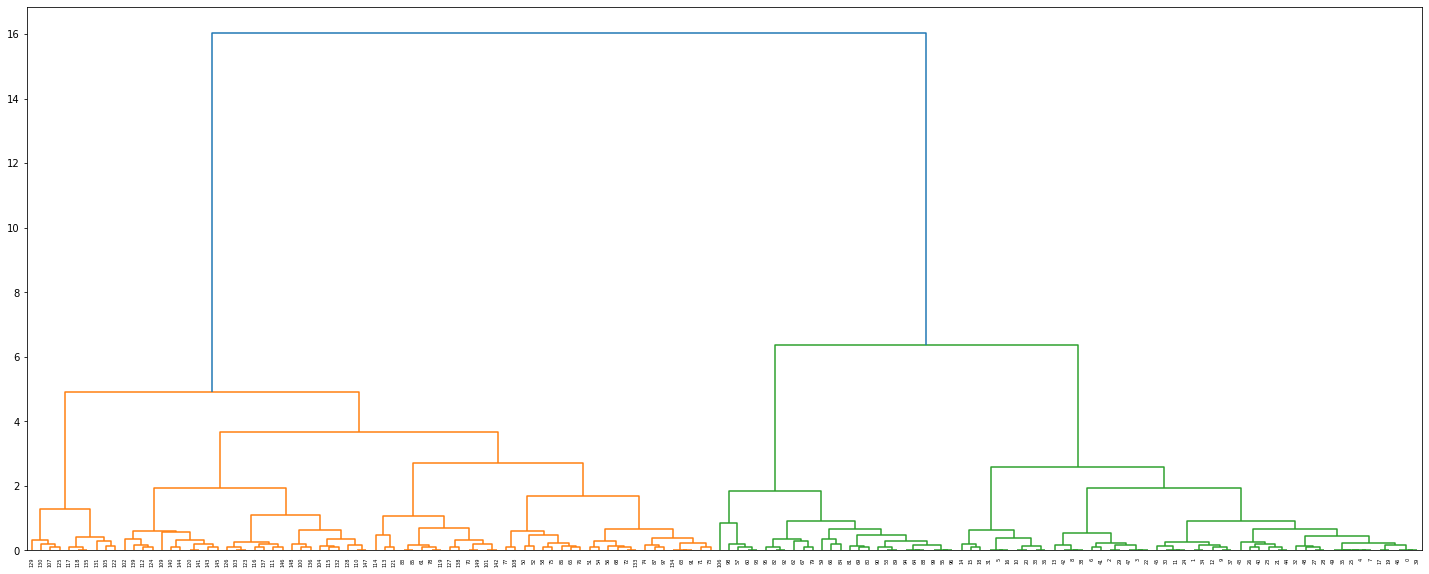

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

Поделим ирис на кластеры.

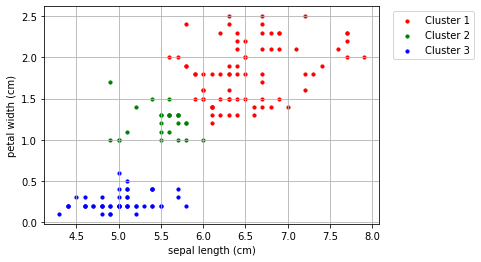

In [3]:
lables = fcluster(Z, t=5, criterion='distance')

for i, color in enumerate(clusters):
    plt.scatter(X[lables==i+1, 0], X[lables==i+1, 1], s=10, c=color, label=f'Cluster {i+1}')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()

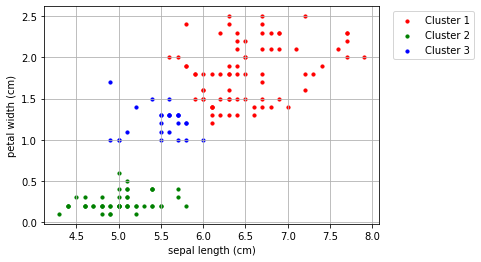

In [4]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=n_clusters)
model = model.fit(X)

labels = model.labels_

for i, color in enumerate(clusters):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], s=10, c=color, label=f'Cluster {i+1}')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()